In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import glob
import os
import random
import seaborn as sns

In [161]:
crime_data_df = pd.read_csv('resources/clean_data.csv').drop_duplicates(subset=['incident_id'])

crime_data_df.head()

,agency_id,incident_id,nibrs_month_id,incident_date,county_name,ncic_agency_name,population,offense_name,crime_against,offense_category_name,offense_id,location_id,arrestee_id,arrest_date,offense_code,age_num,sex_code,race_id,race_desc,location_code,location_name
0,18170,147462560,40388953,2022-01-02,ANDERSON,ANDERSON CO SO CLINTON,33960,Stolen Property Offenses,Property,Stolen Property Offenses,176908831,35,45179953,2022-01-10,280,27,M,10,White,20,Residence/Home
1,18170,147462424,40388953,2022-01-03,ANDERSON,ANDERSON CO SO CLINTON,33960,Simple Assault,Person,Assault Offenses,176908670,35,45179912,2022-01-03,13B,72,M,10,White,20,Residence/Home
2,18170,147462438,40388953,2022-01-03,ANDERSON,ANDERSON CO SO CLINTON,33960,Simple Assault,Person,Assault Offenses,176908687,35,45179916,2022-01-03,13B,40,M,10,White,20,Residence/Home
3,18170,147462568,40388953,2022-01-08,ANDERSON,ANDERSON CO SO CLINTON,33960,Aggravated Assault,Person,Assault Offenses,176908840,35,45179956,2022-01-08,13A,25,M,10,White,20,Residence/Home
5,18170,147462542,40388953,2022-01-10,ANDERSON,ANDERSON CO SO CLINTON,33960,All Other Larceny,Property,Larceny/Theft Offenses,176908817,35,45179950,2022-01-10,23H,28,M,10,White,20,Residence/Home


In [162]:
crime_data_df['incident_date'] = pd.to_datetime(crime_data_df['incident_date']).dt.strftime('%m')
crime_data_df.head()

,agency_id,incident_id,nibrs_month_id,incident_date,county_name,ncic_agency_name,population,offense_name,crime_against,offense_category_name,offense_id,location_id,arrestee_id,arrest_date,offense_code,age_num,sex_code,race_id,race_desc,location_code,location_name
0,18170,147462560,40388953,01,ANDERSON,ANDERSON CO SO CLINTON,33960,Stolen Property Offenses,Property,Stolen Property Offenses,176908831,35,45179953,2022-01-10,280,27,M,10,White,20,Residence/Home
1,18170,147462424,40388953,01,ANDERSON,ANDERSON CO SO CLINTON,33960,Simple Assault,Person,Assault Offenses,176908670,35,45179912,2022-01-03,13B,72,M,10,White,20,Residence/Home
2,18170,147462438,40388953,01,ANDERSON,ANDERSON CO SO CLINTON,33960,Simple Assault,Person,Assault Offenses,176908687,35,45179916,2022-01-03,13B,40,M,10,White,20,Residence/Home
3,18170,147462568,40388953,01,ANDERSON,ANDERSON CO SO CLINTON,33960,Aggravated Assault,Person,Assault Offenses,176908840,35,45179956,2022-01-08,13A,25,M,10,White,20,Residence/Home
5,18170,147462542,40388953,01,ANDERSON,ANDERSON CO SO CLINTON,33960,All Other Larceny,Property,Larceny/Theft Offenses,176908817,35,45179950,2022-01-10,23H,28,M,10,White,20,Residence/Home


In [163]:
crime_data_df.rename(columns={'incident_date': 'incident_month', 'offense_name': 'offense'}, inplace=True)
crime_data_df.head()

,agency_id,incident_id,nibrs_month_id,incident_month,county_name,ncic_agency_name,population,offense,crime_against,offense_category_name,offense_id,location_id,arrestee_id,arrest_date,offense_code,age_num,sex_code,race_id,race_desc,location_code,location_name
0,18170,147462560,40388953,01,ANDERSON,ANDERSON CO SO CLINTON,33960,Stolen Property Offenses,Property,Stolen Property Offenses,176908831,35,45179953,2022-01-10,280,27,M,10,White,20,Residence/Home
1,18170,147462424,40388953,01,ANDERSON,ANDERSON CO SO CLINTON,33960,Simple Assault,Person,Assault Offenses,176908670,35,45179912,2022-01-03,13B,72,M,10,White,20,Residence/Home
2,18170,147462438,40388953,01,ANDERSON,ANDERSON CO SO CLINTON,33960,Simple Assault,Person,Assault Offenses,176908687,35,45179916,2022-01-03,13B,40,M,10,White,20,Residence/Home
3,18170,147462568,40388953,01,ANDERSON,ANDERSON CO SO CLINTON,33960,Aggravated Assault,Person,Assault Offenses,176908840,35,45179956,2022-01-08,13A,25,M,10,White,20,Residence/Home
5,18170,147462542,40388953,01,ANDERSON,ANDERSON CO SO CLINTON,33960,All Other Larceny,Property,Larceny/Theft Offenses,176908817,35,45179950,2022-01-10,23H,28,M,10,White,20,Residence/Home


In [164]:
reduced_table = crime_data_df.loc[:,["incident_id", "incident_month"]]

reduced_table.head()

,incident_id,incident_month
0,147462560,01
1,147462424,01
2,147462438,01
3,147462568,01
5,147462542,01


In [165]:
month_counts = reduced_table['incident_month'].value_counts().sort_index()

month_counts.index = ['January', 'February', 'March', 'April', 'May', 'June',
                      'July', 'August', 'September', 'October','November','December']

month_counts.head(12)

January       9151
February      9096
March        10012
April         9493
May           9278
June          8957
July          9099
August        9298
September     8991
October       8555
November      8082
December      8000
Name: count, dtype: int64

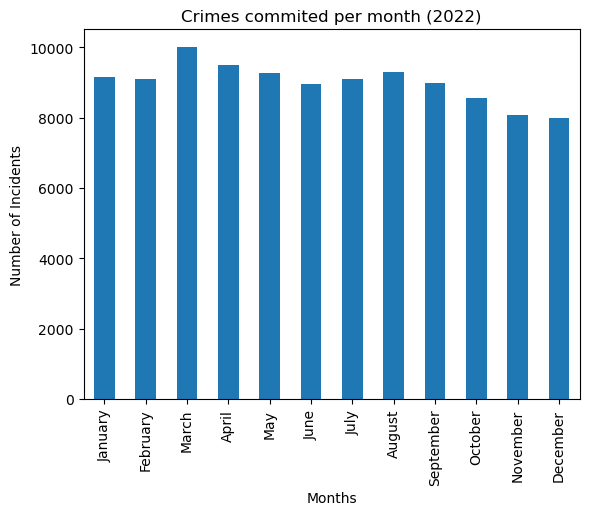

In [179]:
month_counts.plot(kind="bar")

plt.xlabel("Months")

plt.ylabel("Number of Incidents")

plt.title("Crimes commited per month (2022)")

plt.savefig('../Resources_2022/Incidents_by_month.png', bbox_inches='tight')

plt.show()

In [167]:
crime_types = crime_data_df.loc[:,["incident_id", "offense"]]

crime_types.head()

,incident_id,offense
0,147462560,Stolen Property Offenses
1,147462424,Simple Assault
2,147462438,Simple Assault
3,147462568,Aggravated Assault
5,147462542,All Other Larceny


In [168]:
crime_type_counts = crime_types['offense'].value_counts()
crime_type_counts.head(10)

offense
Drug/Narcotic Violations                    34040
Simple Assault                              22140
Shoplifting                                  9891
Aggravated Assault                           9402
Drug Equipment Violations                    4622
Destruction/Damage/Vandalism of Property     3181
Motor Vehicle Theft                          2803
Burglary/Breaking & Entering                 2803
Intimidation                                 2407
Weapon Law Violations                        2375
Name: count, dtype: int64

In [169]:
crime_type_df = crime_type_counts.reset_index()

crime_type_df.columns = ['Offense', 'Count']

crime_type_df.head()

,Offense,Count
0,Drug/Narcotic Violations,34040
1,Simple Assault,22140
2,Shoplifting,9891
3,Aggravated Assault,9402
4,Drug Equipment Violations,4622


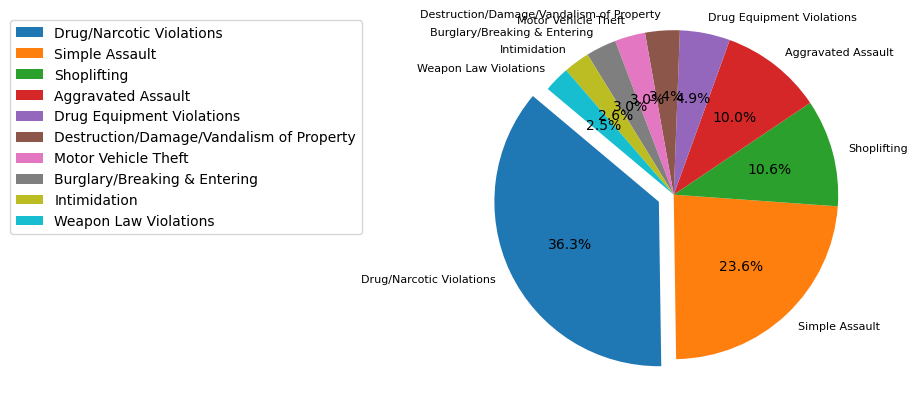

In [178]:
top_10 = crime_type_df.nlargest(10, 'Count')

# Create a color map
cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0, 1, len(top_10)))

# Create a pie chart
fig, ax = plt.subplots()

# The explode parameter is used to single out the highest one.
explode = (0.1,) + (0,) * (len(top_10) - 1)
patches, texts, autotexts = ax.pie(top_10['Count'], labels=top_10['Offense'], autopct='%1.1f%%', startangle=140, explode=explode, colors=colors)

# Improve the visibility of labels by increasing the font size
for text in texts:
    text.set_fontsize(8)

# Move the legend to an empty part of the plot
ax.legend(patches, top_10['Offense'], loc='best', bbox_to_anchor=(-0.1, 1.))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('../Resources_2022/top_10_incident_type.png', bbox_inches='tight')

plt.show()

In [171]:
location_crime_df = crime_data_df[['incident_id', 'location_name']]
location_crime_df.head(10)

,incident_id,location_name
0,147462560,Residence/Home
1,147462424,Residence/Home
2,147462438,Residence/Home
3,147462568,Residence/Home
5,147462542,Residence/Home
7,147462485,Residence/Home
9,147462520,Residence/Home
10,153000232,Residence/Home
11,156098093,Residence/Home
12,147462562,Residence/Home


In [172]:
incidents_location = location_crime_df['location_name'].value_counts()
incidents_location.head()

location_name
Residence/Home                        36916
Highway/Road/Alley/Street/Sidewalk    29668
Parking/Drop Lot/Garage                9260
Department/Discount Store              8006
School-Elementary/Secondary            3333
Name: count, dtype: int64

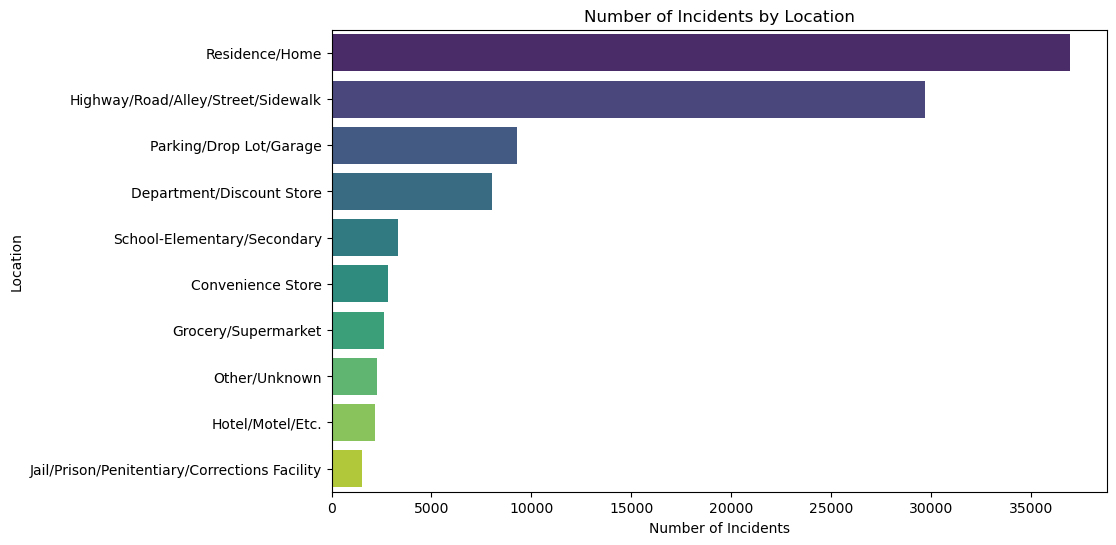

In [177]:
# Get the top 10 locations
top_10_locations = incidents_location.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_locations.values, y=top_10_locations.index, palette='viridis')

# Add labels and title
plt.xlabel('Number of Incidents')
plt.ylabel('Location')
plt.title('Number of Incidents by Location')

plt.savefig('../Resources_2022/incidents_by_location.png', bbox_inches='tight')

# Show the plot
plt.show()